In [1]:
import GAN.models as models

Using Theano backend.


In [2]:
reload(models)

# generator = models.get_generator((1,1),[128,64,32,16])
generator = models.get_generator((1,1),(1,1),[16]*5,do_down=False)#,do_sigmoid=[False,True]*2+[False])#,do_bn=[True]*3+[False]*2)

discriminator = models.get_discriminator((1,1),[512]*5) # ,256,128,64,32]


(1, 1)


In [3]:
generator.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_input (InputLayer)             (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_up1_dense (Dense)              (None, 1, 16)         32          G_input[0][0]                    
____________________________________________________________________________________________________
G_up1_activ (PReLU)              (None, 1, 16)         16          G_up1_dense[0][0]                
____________________________________________________________________________________________________
G_up2_dense (Dense)              (None, 1, 16)         272         G_up1_activ[0][0]                
___________________________________________________________________________________________

In [4]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
D_input (InputLayer)         (None, 1, 1)              0         
_________________________________________________________________
D_down1_dense (Dense)        (None, 1, 512)            1024      
_________________________________________________________________
D_down1_activ (Activation)   (None, 1, 512)            0         
_________________________________________________________________
D_down2_dense (Dense)        (None, 1, 512)            262656    
_________________________________________________________________
D_down2_activ (Activation)   (None, 1, 512)            0         
_________________________________________________________________
D_down3_dense (Dense)        (None, 1, 512)            262656    
_________________________________________________________________
D_down3_activ (Activation)   (None, 1, 512)            0         
__________

In [5]:
reload(models)

dm = models.discriminator_model(discriminator)
am = models.adversarial_model(generator,discriminator)

In [6]:
# x = np.random.normal(1,2,(10000,1,1))
#x = np.random.poisson(5,(10000,1,1)).astype(np.float32)
x = np.random.gamma(1.8,3,(10000,1,1)).astype(np.float32)
x -= x.mean()
x /= x.std()
x += np.random.normal(2,0.5,(10000,1,1)).astype(np.float32)*(np.random.uniform(0,1,(10000,1,1))>0.6).astype(np.float32)
# x += np.random.normal(-2,0.5,(10000,1,1)).astype(np.float32)*(np.random.uniform(0,1,(10000,1,1))>0.8).astype(np.float32)

z = np.random.normal(0,1,(10000,1,1))


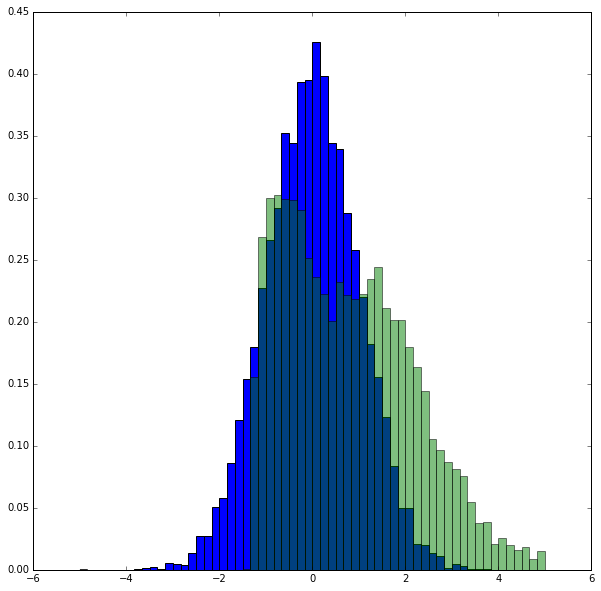

In [7]:
plt.hist(z.ravel(),bins=60,range=[-5,5],normed=True);
plt.hist(x.ravel(),bins=60,range=[-5,5],alpha=0.5,normed=True);

In [8]:
probs = np.arange(1,100,1)
cdf_x = np.percentile(x,probs)
cdf_z = np.percentile(z,probs)


In [9]:
# generator.compile(optimizer=models.Adam(lr=1e-3),loss='mse')

# for ie in range(5):
#     generator.fit(z,z+np.random.normal(0.,0.5,z.shape))

19


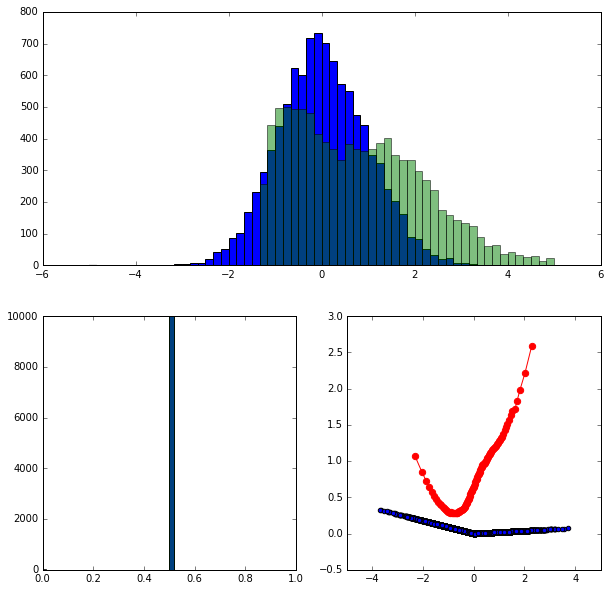

(0.033456799, 0.81124896, 0.9587971, 1.440776)
0: D [0.693869 0.500000] A: [0.681317 0.529297]
0: D [0.645507 0.598633] A: [0.772412 0.189453]
0: D [0.636672 0.605469] A: [0.859388 0.125000]
0: D [0.636692 0.605469] A: [0.841028 0.148438]
0: D [0.637681 0.600586] A: [0.841795 0.140625]


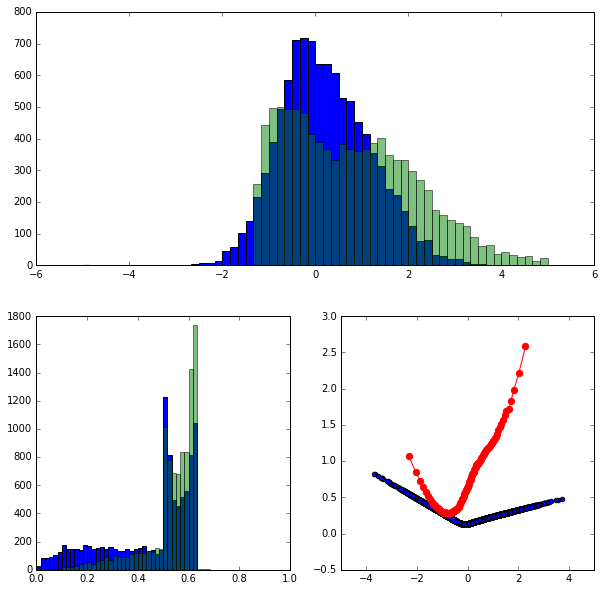

(0.22023652, 0.81124896, 0.96683627, 1.440776)
0: D [0.638863 0.596680] A: [0.834337 0.181641]
0: D [0.641040 0.601562] A: [0.834968 0.226562]
0: D [0.643315 0.612305] A: [0.832224 0.232422]
0: D [0.644248 0.621094] A: [0.824858 0.250000]
0: D [0.645264 0.622070] A: [0.815118 0.259766]


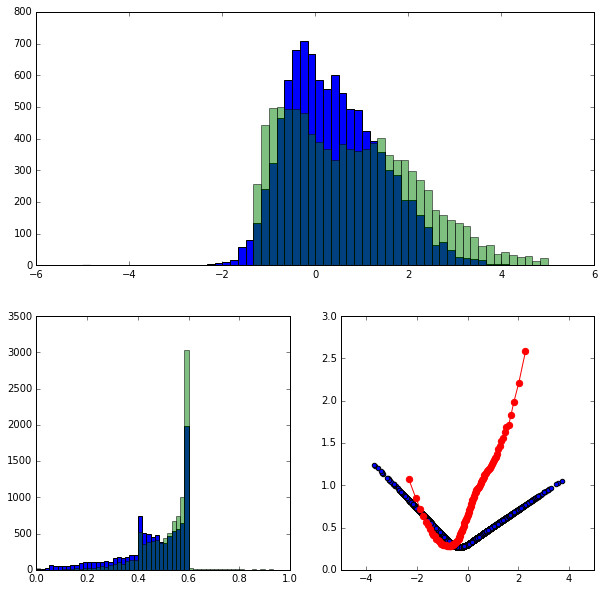

(0.41703144, 0.81124896, 1.0235627, 1.440776)
0: D [0.647882 0.623047] A: [0.800692 0.277344]
0: D [0.651600 0.622070] A: [0.786012 0.283203]
0: D [0.654613 0.620117] A: [0.775945 0.292969]
0: D [0.657409 0.617188] A: [0.770880 0.302734]
0: D [0.660725 0.608398] A: [0.766340 0.306641]


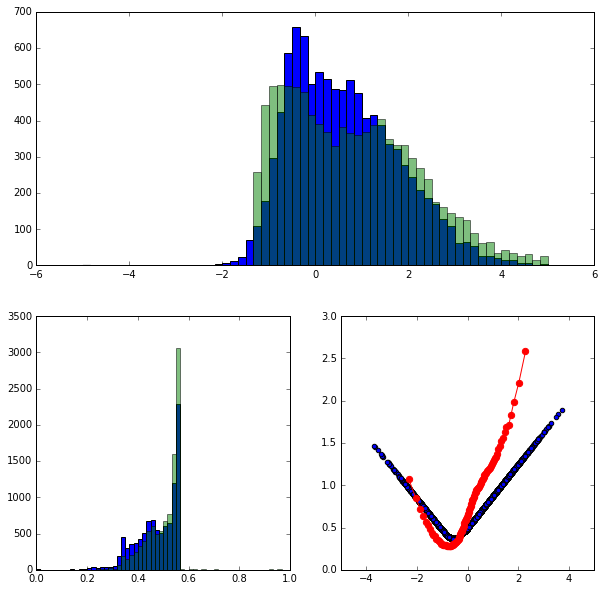

(0.63123858, 0.81124896, 1.1569957, 1.440776)
0: D [0.664217 0.599609] A: [0.764762 0.298828]
0: D [0.667225 0.587891] A: [0.756950 0.306641]
0: D [0.670334 0.584961] A: [0.743996 0.324219]
0: D [0.673365 0.575195] A: [0.733249 0.335938]
0: D [0.675744 0.569336] A: [0.727062 0.279297]


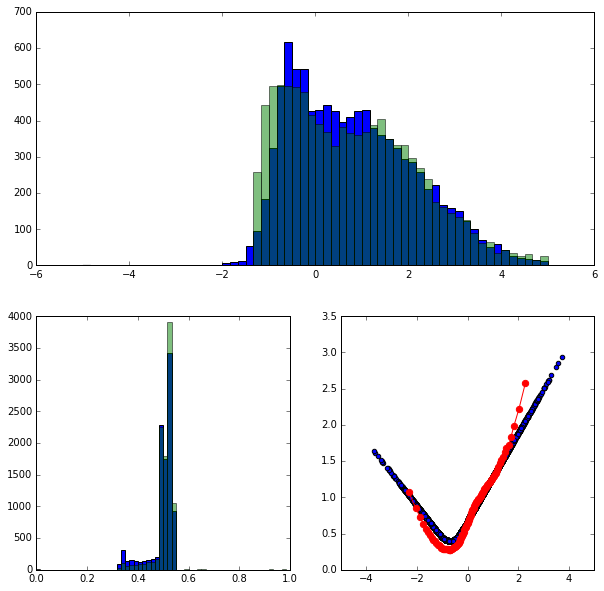

(0.83728361, 0.81124896, 1.3424245, 1.440776)
0: D [0.677721 0.568359] A: [0.716985 0.240234]
0: D [0.679261 0.564453] A: [0.710376 0.279297]
0: D [0.680623 0.562500] A: [0.710561 0.261719]
0: D [0.681728 0.551758] A: [0.706968 0.273438]
0: D [0.682656 0.554688] A: [0.710957 0.251953]


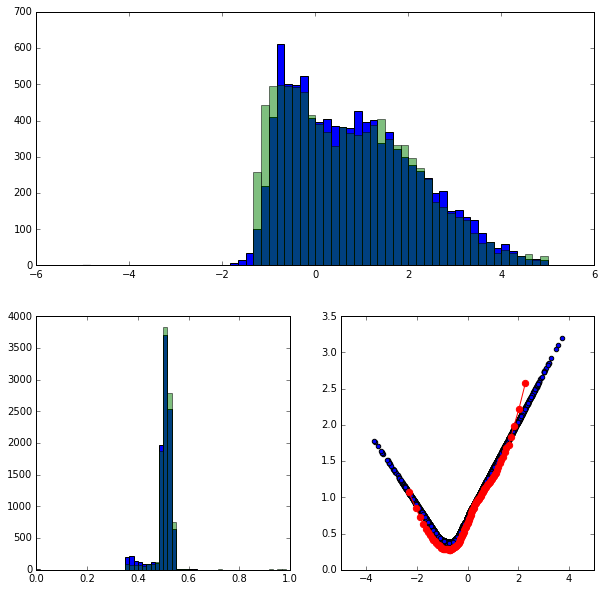

(0.88047117, 0.81124896, 1.3990964, 1.440776)
0: D [0.683717 0.544922] A: [0.709674 0.248047]
0: D [0.685195 0.544922] A: [0.711780 0.238281]
0: D [0.686026 0.541016] A: [0.707650 0.244141]
0: D [0.684810 0.540039] A: [0.709893 0.226562]
0: D [0.685306 0.542969] A: [0.708790 0.218750]


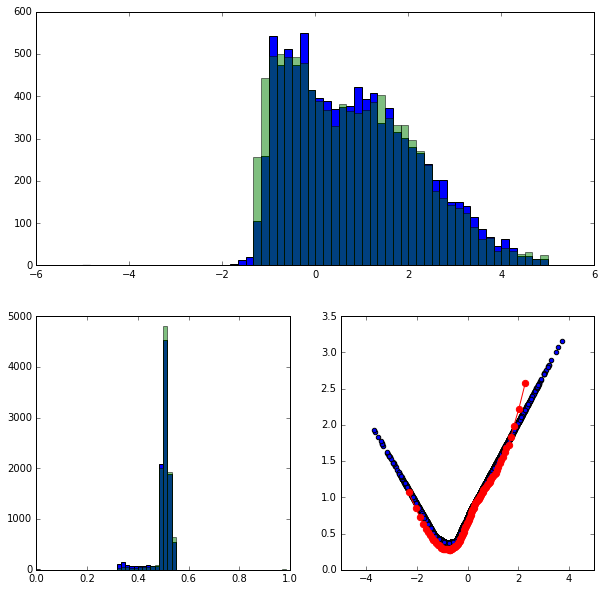

(0.87112284, 0.81124896, 1.3984573, 1.440776)
0: D [0.685741 0.535156] A: [0.708793 0.226562]
0: D [0.687098 0.533203] A: [0.709565 0.201172]
0: D [0.687067 0.529297] A: [0.706529 0.218750]
0: D [0.687519 0.523438] A: [0.705636 0.218750]
0: D [0.688493 0.524414] A: [0.708093 0.218750]


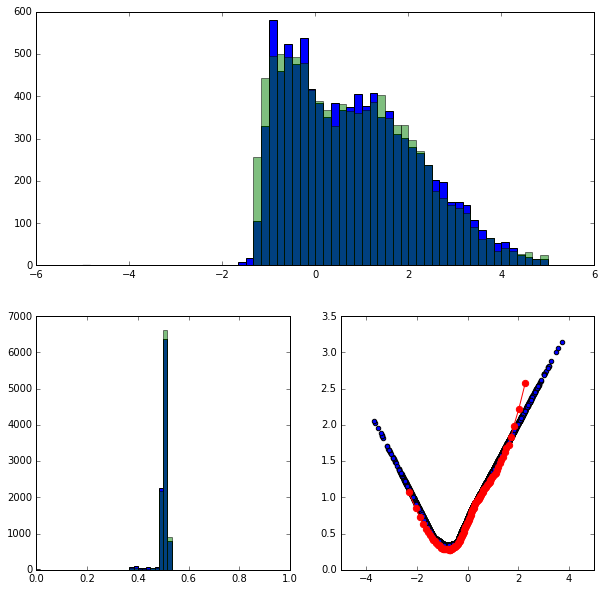

(0.85158849, 0.81124896, 1.4054016, 1.440776)
0: D [0.689425 0.527344] A: [0.706820 0.207031]
0: D [0.689076 0.525391] A: [0.705253 0.216797]
0: D [0.690907 0.520508] A: [0.703662 0.250000]
0: D [0.690820 0.514648] A: [0.700168 0.330078]
0: D [0.691264 0.515625] A: [0.698097 0.441406]


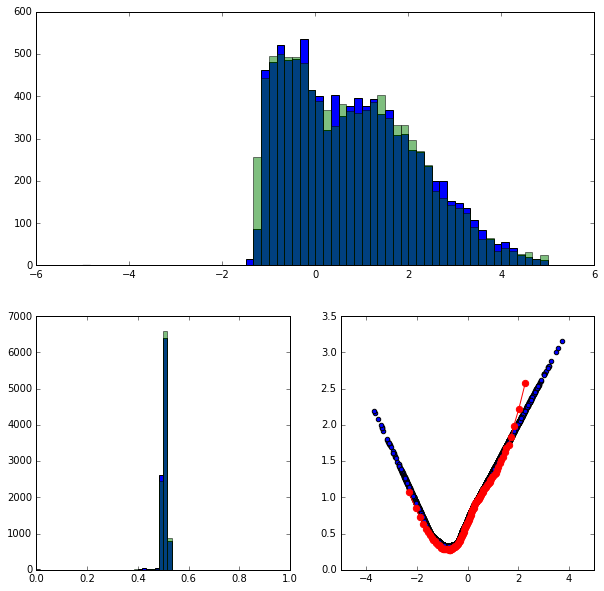

(0.84136271, 0.81124896, 1.4076425, 1.440776)
0: D [0.692315 0.509766] A: [0.697153 0.583984]
0: D [0.691755 0.500977] A: [0.700212 0.468750]
0: D [0.691651 0.506836] A: [0.700161 0.375000]
0: D [0.692430 0.503906] A: [0.695951 0.578125]
0: D [0.692312 0.504883] A: [0.695775 0.593750]


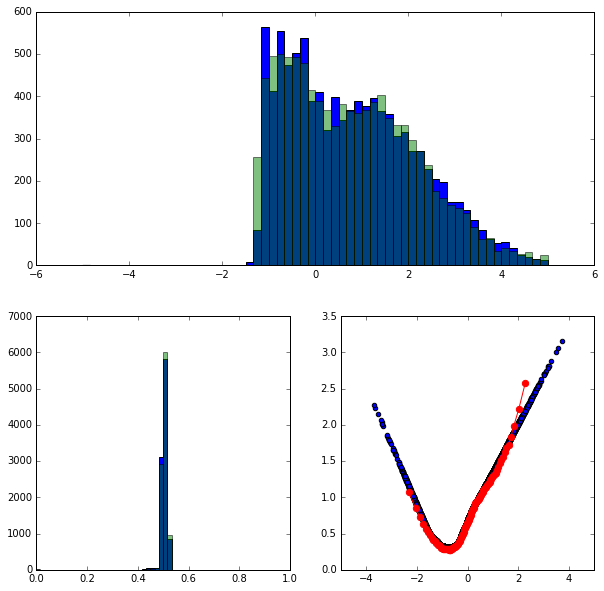

(0.83116424, 0.81124896, 1.411397, 1.440776)
0: D [0.692640 0.505859] A: [0.699206 0.394531]
0: D [0.691836 0.505859] A: [0.689036 0.601562]
0: D [0.692137 0.520508] A: [0.689747 0.632812]
0: D [0.692214 0.504883] A: [0.687853 0.650391]


KeyboardInterrupt: 

In [10]:
n_epochs = 50

batch_size = 512
n_batches = 10000 // batch_size

print(n_batches)

# print_int = max(2,(n_batches // 10))
print_int = n_batches

def train_batch(ib):
    x_batch = x[ib*batch_size:(ib+1)*batch_size]
    z_batch = z[ib*batch_size:(ib+1)*batch_size]
    g_batch = generator.predict(z_batch)
    
    x_train = np.vstack([x_batch,g_batch])
    y_train = np.ones( (2*batch_size,1) )
    y_train[:batch_size,:] = 0
    
    generator.trainable=False
    d_loss = dm.train_on_batch(x_train,y_train)
    #d_loss = [0,0]
    generator.trainable=True
    a_loss = am.train_on_batch(z_batch,np.zeros((batch_size,1)))
    # a_loss = [0,0]
    
    if ib % print_int == 0:
        msg = "%d: D [%f %f] A: [%f %f]" % (ib, d_loss[0], d_loss[1], a_loss[0], a_loss[1])
        print(msg)
    

predictions = []
for iepoch in range(n_epochs):
    if iepoch % 5 == 0:
        x_predict = generator.predict(z)
        predictions.append(x_predict)
        plt.subplot(2,1,1)
        plt.hist(x_predict.ravel(),bins=60,range=[-5,5]);
        plt.hist(x.ravel(),bins=60,range=[-5,5],alpha=0.5);
        plt.subplot(2,2,3)
        x_discrim = discriminator.predict(x)
        z_discrim = discriminator.predict(x_predict)
        plt.hist(x_discrim.ravel(),bins=60,range=[0,1]);
        plt.hist(z_discrim.ravel(),bins=60,range=[0,1],alpha=0.5);        
        plt.subplot(2,2,4)
        plt.scatter(z.ravel(),x_predict.ravel()-z.ravel());
        plt.scatter(cdf_z,cdf_x-cdf_z,color='red',s=40)
        plt.plot(cdf_z,cdf_x-cdf_z,color='red')
        plt.show()
        print(x_predict.mean(),x.mean(),x_predict.std(),x.std())
    for ib in range(n_batches):
        train_batch(ib)
        



In [ ]:
x_predictions = np.hstack(predictions[3:])

In [ ]:
# x_predict = generator.predict(z)

In [ ]:
plt.hist(x_predictions[:,-3].ravel(),bins=60,range=[-5,5],normed=True);
#plt.hist(x_predictions.mean(axis=1).ravel(),bins=60,range=[-5,5],alpha=0.5,normed=True)
plt.hist(x.ravel(),bins=60,range=[-5,5],alpha=0.5,normed=True);

In [ ]:
x_predictions.mean()

In [ ]:
x.mean()

In [ ]:
x.std()

In [ ]:
x_predictions.std()

In [ ]:
plt.scatter(z.ravel(),x_predictions.mean(axis=1).ravel())
plt.scatter(cdf_z,cdf_x,color='red',s=40)


In [ ]:
#?plt.scatter